In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils_cd import (
        split_dataset,
        standard_deviation,
        plot_comparison_results,
        impute_values,
        plot_results,
        plot_param_improv,
        plot_results_from_csv,
        aps_classifier_statistics
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

pd.options.display.max_columns = None
sns.set(style='darkgrid')

CLASS = 'class'
train = pd.read_csv('./aps_failure_training_set.csv',
                        skiprows=20,keep_default_na=False, na_values='na')
test = pd.read_csv('./aps_failure_test_set.csv',
                        skiprows=20,keep_default_na=False, na_values='na')

X_train, y_train = split_dataset(train, CLASS)
X_test, y_test = split_dataset(test, CLASS)
y_train = y_train.map({'pos': 1, 'neg': 0})
y_test = y_test.map({'pos': 1, 'neg': 0})

X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)

def normalize(X_train, X_test):
    normalizer = Normalizer().fit(X_train)

    X_train_norm = normalizer.transform(X_train)
    X_test_norm = normalizer.transform(X_test)
    
    return X_train_norm, X_test_norm

aps = pd.concat([X_train, X_test])

clf = DecisionTreeClassifier(random_state=42)
min_samples = np.concatenate([np.arange(5, 51, 5), np.arange(100, 1001, 100)])
results = {}
res_i = 0

In [2]:
min_samples

array([   5,   10,   15,   20,   25,   30,   35,   40,   45,   50,  100,
        200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [3]:
X_train, X_test = X_train.fillna(X_train.median()), X_test.fillna(X_train.median())

In [4]:
for samples in min_samples:
    res = aps_classifier_statistics(DecisionTreeClassifier(min_samples_split=samples), X_train, X_test, y_train, y_test)
    results[res_i] = {'Price': res['score'], 'Transformation': 'Baseline', 'Min Samples to Split': samples}
    res_i += 1
    print(res)

{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.989, 'confusion_matrix': array([[15562,    63],
       [  113,   262]]), 'sensibility': 0.6986666666666667, 'specificity': 0.995968, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'score': 57130}
{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.989125, 'confusion_matrix': array([[15563,    62],
       [  112,   263]]), 'sensibility': 0.7013333333333334, 'specificity': 0.996032, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_sa

{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.9850625, 'confusion_matrix': array([[15555,    70],
       [  169,   206]]), 'sensibility': 0.5493333333333333, 'specificity': 0.99552, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=600,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'score': 85200}
{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.98525, 'confusion_matrix': array([[15558,    67],
       [  169,   206]]), 'sensibility': 0.5493333333333333, 'specificity': 0.995712, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, mi

In [6]:
def balance(X_train, y_train):
    balancer = RandomUnderSampler(ratio=0.3, random_state=42)
    X_train_bal, y_train_bal = balancer.fit_sample(X_train, y_train)
    return X_train_bal, y_train_bal

X_train, y_train = balance(X_train, y_train)

for samples in min_samples:
    res = aps_classifier_statistics(DecisionTreeClassifier(min_samples_split=samples), X_train, X_test, y_train, y_test)
    results[res_i] = {'Price': res['score'], 'Transformation': 'Undersample 70-30', 'Min Samples to Split': samples}
    res_i += 1
    print(res)

/home/francisconeves/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.96275, 'confusion_matrix': array([[15070,   555],
       [   41,   334]]), 'sensibility': 0.8906666666666667, 'specificity': 0.96448, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'score': 26050}
{'predicted': array([0, 0, 1, ..., 0, 0, 0]), 'accuracy': 0.9638125, 'confusion_matrix': array([[15086,   539],
       [   40,   335]]), 'sensibility': 0.8933333333333333, 'specificity': 0.965504, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_

{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.9364375, 'confusion_matrix': array([[14613,  1012],
       [    5,   370]]), 'sensibility': 0.9866666666666667, 'specificity': 0.935232, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=600,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'score': 12620}
{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.9364375, 'confusion_matrix': array([[14613,  1012],
       [    5,   370]]), 'sensibility': 0.9866666666666667, 'specificity': 0.935232, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1,

In [8]:
train = pd.read_csv('./aps_failure_training_set.csv',
                        skiprows=20,keep_default_na=False, na_values='na')
test = pd.read_csv('./aps_failure_test_set.csv',
                        skiprows=20,keep_default_na=False, na_values='na')

X_train, y_train = split_dataset(train.dropna(thresh=150), CLASS)
X_test, y_test = split_dataset(test.dropna(thresh=150), CLASS)
y_train = y_train.map({'pos': 1, 'neg': 0})
y_test = y_test.map({'pos': 1, 'neg': 0})

X_train, X_test = X_train.fillna(X_train.median()), X_test.fillna(X_train.median())
X_train, y_train = balance(X_train, y_train)

for samples in min_samples:
    res = aps_classifier_statistics(DecisionTreeClassifier(min_samples_split=samples), X_train, X_test, y_train, y_test)
    results[res_i] = {'Price': res['score'], 'Transformation': 'Missing Values Heuristic', 'Min Samples to Split': samples}
    res_i += 1
    print(res)

/home/francisconeves/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.9656221478551871, 'confusion_matrix': array([[12536,   431],
       [   21,   160]]), 'sensibility': 0.8839779005524862, 'specificity': 0.9667617799028303, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'score': 14810}
{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.9669151201703681, 'confusion_matrix': array([[12552,   415],
       [   20,   161]]), 'sensibility': 0.8895027624309392, 'specificity': 0.9679956813449526, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=N

{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.9523881959233343, 'confusion_matrix': array([[12352,   615],
       [   11,   170]]), 'sensibility': 0.9392265193370166, 'specificity': 0.9525719133184237, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'score': 11650}
{'predicted': array([0, 0, 0, ..., 0, 0, 0]), 'accuracy': 0.9523881959233343, 'confusion_matrix': array([[12352,   615],
       [   11,   170]]), 'sensibility': 0.9392265193370166, 'specificity': 0.9525719133184237, 'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split

In [ ]:
"""balancers = [(RandomUnderSampler(random_state=42), 'Undersample 50-50'), (RandomUnderSampler(ratio=0.3, random_state=42), 'Undersample 70-30'), (SMOTE(ratio=1.0, random_state=42), 'SMOTE 50-50'), (SMOTE(ratio=0.3, random_state=42), 'SMOTE 70-30')]
filename = 'dt_balancing'
measures = {}
i = 0

for samples in min_samples:
    for balancer, name in balancers:
        X_train_bal, y_train_bal = balancer.fit_sample(X_train, y_train)
        res = aps_classifier_statistics(DecisionTreeClassifier(min_samples_split=samples), X_train_bal, X_test, y_train_bal, y_test)
        print(res)
        estimator = res['clf']
        n_nodes = estimator.tree_.node_count
        children_left = estimator.tree_.children_left
        children_right = estimator.tree_.children_right
        feature = estimator.tree_.feature
        threshold = estimator.tree_.threshold


        # The tree structure can be traversed to compute various properties such
        # as the depth of each node and whether or not it is a leaf.
        node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
        is_leaves = np.zeros(shape=n_nodes, dtype=bool)
        stack = [(0, -1)]  # seed is the root node id and its parent depth
        n_leaves = 0
        while len(stack) > 0:
            node_id, parent_depth = stack.pop()
            node_depth[node_id] = parent_depth + 1

            # If we have a test node
            if (children_left[node_id] != children_right[node_id]):
                stack.append((children_left[node_id], parent_depth + 1))
                stack.append((children_right[node_id], parent_depth + 1))
            else:
                n_leaves += 1
        measures[i] = {'Price': res['score'], 'Technique': name, 'Min Samples to Split': samples, 'Leafs': n_leaves}
        i += 1
"""


/home/francisconeves/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.clf()>

<Figure size 1152x432 with 0 Axes>

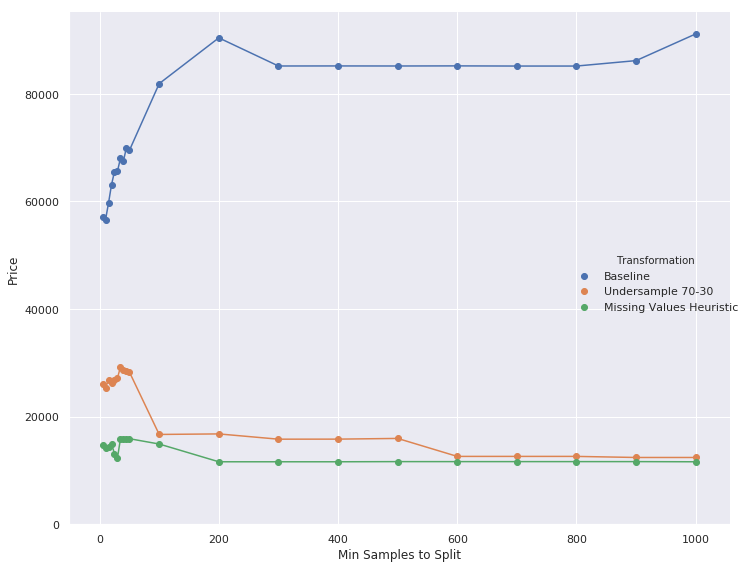

In [11]:
plt.figure(figsize=(16,6))
filename = 'dt_comparasion'
measures = pd.DataFrame.from_dict(results, "index")
measures.to_csv('plot_data/{}.csv'.format(filename))
    
g = sns.FacetGrid(measures, hue="Transformation", size=8)
g = g.map(plt.scatter, "Min Samples to Split", "Price").add_legend()
g = g.map(plt.plot, "Min Samples to Split", "Price")
g.axes[0,0].set_ylim(ymin=0)

plt.savefig('images/{}.pdf'.format(filename))
plt.clf